In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(rescale=1./255)

training_set=datagen.flow_from_directory(r"E:\ml1\train",
                                                target_size=(64,64), 
                                               batch_size=100,
                                               class_mode = 'categorical')
test_set=datagen.flow_from_directory(r"E:\ml1\test",
                                                target_size=(64,64), 
                                               batch_size=100,
                                               class_mode = 'categorical')
# class_mode='categorical' if you have more than 2 classses

Found 1490 images belonging to 5 classes.
Found 521 images belonging to 5 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)      

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
early_stopping= EarlyStopping(monitor='accuracy',patience =3)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [8]:
model.fit(training_set, epochs=30, validation_data=test_set,callbacks=[early_stopping])

Epoch 1/30
 1/15 [=>............................] - ETA: 18s - loss: 1.6387 - accuracy: 0.1600

C:\Users\SAHIL\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 10s 633ms/step - loss: 1.6111 - accuracy: 0.3537 - val_loss: 1.4969 - val_accuracy: 0.5010
Epoch 2/30
15/15 [==============================] - 9s 610ms/step - loss: 1.0957 - accuracy: 0.6282 - val_loss: 0.8738 - val_accuracy: 0.6871
Epoch 3/30
15/15 [==============================] - 8s 573ms/step - loss: 0.7146 - accuracy: 0.7383 - val_loss: 0.7516 - val_accuracy: 0.7083
Epoch 4/30
15/15 [==============================] - 9s 584ms/step - loss: 0.5757 - accuracy: 0.8074 - val_loss: 0.6563 - val_accuracy: 0.7678
Epoch 5/30
15/15 [==============================] - 9s 580ms/step - loss: 0.4977 - accuracy: 0.8221 - val_loss: 0.6309 - val_accuracy: 0.7754
Epoch 6/30
15/15 [==============================] - 9s 593ms/step - loss: 0.3882 - accuracy: 0.8658 - val_loss: 0.5824 - val_accuracy: 0.7831
Epoch 7/30
15/15 [==============================] - 9s 607ms/step - loss: 0.3381 - accuracy: 0.8779 - val_loss: 0.5157 - val_accuracy: 0.7985
Epoch 8/30
15/15

In [9]:
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 0s 22ms/step
SUV


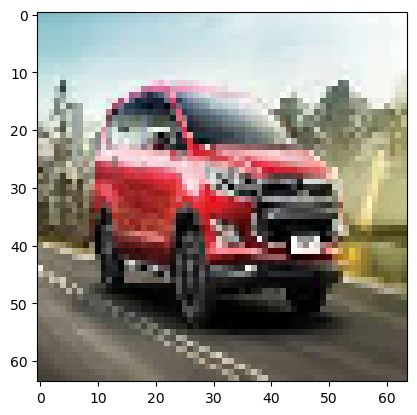

In [25]:
img = image.load_img(r"E:\ml\28.jpg",
                    target_size = (64,64))
plt.imshow(img);
test_img = np.asarray(img)
test_img = test_img.reshape(1,64,64,3)
yhat=model.predict(test_img)
if(np.argmax(yhat))==0:
    print("Bike")
if(np.argmax(yhat))==1:
    print("Heavy")
if(np.argmax(yhat))==2:
    print("Cycle")
if(np.argmax(yhat))==3:
    print("Sedan")
if(np.argmax(yhat))==4:
    print("SUV")

1/1 [==============================] - 0s 20ms/step
Heavy


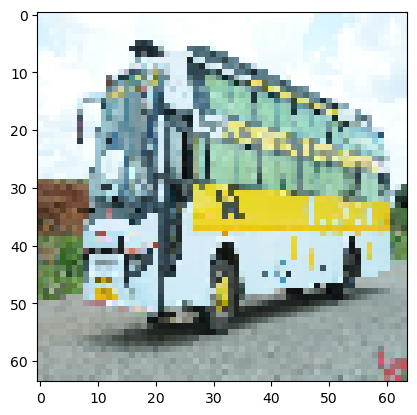

In [26]:
img = image.load_img(r"E:\ml\5483_35_2.png",
                    target_size = (64,64))
plt.imshow(img);
test_img = np.asarray(img)
test_img = test_img.reshape(1,64,64,3)
yhat=model.predict(test_img)
if(np.argmax(yhat))==0:
    print("Bike")
if(np.argmax(yhat))==1:
    print("Heavy")
if(np.argmax(yhat))==2:
    print("Cycle")
if(np.argmax(yhat))==3:
    print("Sedan")
if(np.argmax(yhat))==4:
    print("SUV")

1/1 [==============================] - 0s 22ms/step
Cycle


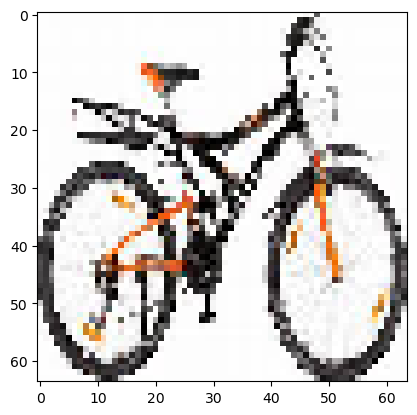

In [46]:
img = image.load_img(r"E:\Work\th.jpg",
                    target_size = (64,64))
plt.imshow(img);
test_img = np.asarray(img)
test_img = test_img.reshape(1,64,64,3)
yhat=model.predict(test_img)
if(np.argmax(yhat))==0:
    print("Bike")
if(np.argmax(yhat))==1:
    print("Heavy")
if(np.argmax(yhat))==2:
    print("Cycle")
if(np.argmax(yhat))==3: 
    print("Sedan")
if(np.argmax(yhat))==4:
    print("SUV")